# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

In [16]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 15
threshold = 0
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)

C:\Users\DELL\Desktop\course\数据挖掘\code\hw4\spectral_clustering\kmeans.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(float)


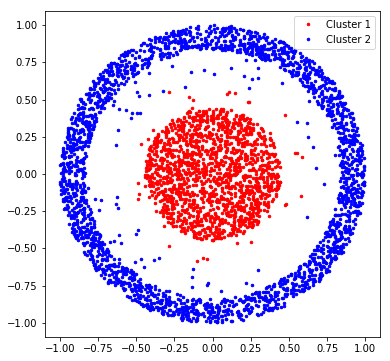

In [17]:
# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

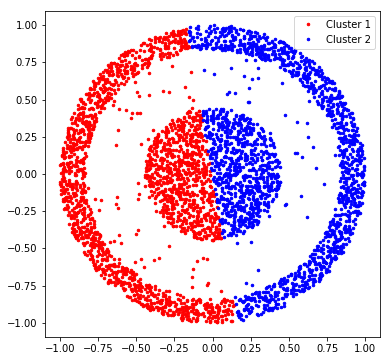

In [18]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [46]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [47]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
# YOUR CODE HERE
# begin answer
fea = fea.toarray()
# fea = ( fea - np.mean(fea, axis=0) ) / np.std(fea, axis=0)
W1 = constructW(fea)
# end answer

In [48]:
sc_accuracy_sum = 0
sc_nmi_sum = 0
kmeans_accuracy_sum = 0
kmeans_nmi_sum = 0
k = 10
for i in range(k):
    idx = spectral(W1.toarray(), 5)
    idx = bestMap(gnd, idx)
    sc_accuracy = (idx == gnd).sum() / idx.shape[0]
    sc_nmi = MutualInfo(gnd, idx)
    sc_accuracy_sum += sc_accuracy
    sc_nmi_sum += sc_nmi
    
    idx = kmeans(W1.toarray(), 5)
    idx = bestMap(gnd, idx)
    kmeans_accuracy = (idx == gnd).sum() / idx.shape[0]
    kmeans_nmi = MutualInfo(gnd, idx)
    kmeans_accuracy_sum += kmeans_accuracy
    kmeans_nmi_sum += kmeans_nmi
    
    print("{0}: Spectral Clustering: accuracy = {1}, nmi = {2}, kmeans: accuracy = {3}, nmi = {4}".format(i, sc_accuracy, sc_nmi, kmeans_accuracy, kmeans_nmi))
print("average: Spectral Clustering: accuracy = {1}, nmi = {2}, kmeans: accuracy = {3}, nmi = {4}".format(i, sc_accuracy_sum / k, sc_nmi_sum / k, kmeans_accuracy_sum / k, kmeans_nmi_sum / k))

0: Spectral Clustering: accuracy = 0.7695223654283548, nmi = 0.6224191807541294, kmeans: accuracy = 0.4025777103866566, nmi = 0.06621680314611973
1: Spectral Clustering: accuracy = 0.7695223654283548, nmi = 0.6224191807541294, kmeans: accuracy = 0.4852160727824109, nmi = 0.028052282675243304
2: Spectral Clustering: accuracy = 0.7619408642911296, nmi = 0.6192723140650636, kmeans: accuracy = 0.621683093252464, nmi = 0.17457221331283473
3: Spectral Clustering: accuracy = 0.7695223654283548, nmi = 0.6224191807541294, kmeans: accuracy = 0.43290371493555724, nmi = 0.055560306932313494
4: Spectral Clustering: accuracy = 0.7695223654283548, nmi = 0.6224191807541294, kmeans: accuracy = 0.5064442759666414, nmi = 0.16933118021422378
5: Spectral Clustering: accuracy = 0.7695223654283548, nmi = 0.6224191807541294, kmeans: accuracy = 0.6398786959818044, nmi = 0.28486290028711575
6: Spectral Clustering: accuracy = 0.7695223654283548, nmi = 0.6224191807541294, kmeans: accuracy = 0.5564821834723275, nm